# Importing Required Modules

In [203]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Data File

In [214]:
data = pd.read_excel("Temp_Data.xlsx")
data

,XC/wt%,XMn/wt%,XV/wt%,XSi/wt%,XCr/wt%,XMo/wt%,XNi/wt%,XW/wt%,Texp/°C
0,0.29,1.64,0.0,0.24,0.05,0.45,0.02,0.0,595
1,0.33,1.48,0.0,0.18,0.16,0.27,0.26,0.0,550
2,0.38,1.49,0.0,0.25,0.00,0.41,0.00,0.0,530
3,0.39,1.59,0.0,0.27,0.16,0.44,0.05,0.0,515
4,0.50,1.50,0.0,0.17,0.20,0.45,0.10,0.0,560
...,...,...,...,...,...,...,...,...,...
88,0.27,2.16,0.0,2.01,0.00,0.00,2.07,0.0,460
89,0.26,2.10,0.0,1.85,0.00,0.00,0.00,0.0,540
90,0.26,2.04,0.0,1.93,1.02,0.00,0.00,0.0,450
91,0.46,2.15,0.0,2.10,0.00,0.00,0.00,0.0,510


In [216]:
# Let us get the feature names
col = data.columns
col

Index(['XC/wt%', 'XMn/wt%', 'XV/wt%', 'XSi/wt%', 'XCr/wt%', 'XMo/wt%',
       'XNi/wt%', 'XW/wt%', 'Texp/°C'],
      dtype='object')

In [215]:
data.describe().T            #descriptive stats

,count,mean,std,min,25%,50%,75%,max
XC/wt%,93.0,0.369731,0.139522,0.095,0.27,0.38,0.44,0.98
XMn/wt%,93.0,0.937419,0.523176,0.200,0.58,0.77,1.18,2.18
XV/wt%,93.0,0.023097,0.057962,0.000,0.00,0.00,0.00,0.23
XSi/wt%,93.0,0.352645,0.581981,0.000,0.00,0.19,0.28,2.13
XCr/wt%,93.0,0.852366,0.643268,0.000,0.49,0.80,1.03,3.34
XMo/wt%,93.0,0.259462,0.218061,0.000,0.05,0.22,0.45,0.90
XNi/wt%,93.0,1.047957,1.243056,0.000,0.00,0.54,1.87,4.23
XW/wt%,93.0,0.025161,0.204103,0.000,0.00,0.00,0.00,1.96
Texp/°C,93.0,524.064516,55.460681,335.000,495.00,538.00,565.00,604.00


# Splitting the Data into Training and Test Data Sets

In [66]:
TargetVariable = 'Texp/°C'
# All other variable are our Features or Predictors

X = data.drop(TargetVariable, axis =1).values
y = data[TargetVariable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

## Linear Regression Model

In [56]:
LinReg = LinearRegression().fit(X_train, y_train)

LinReg.coef_

array([-143.84273876,  -57.36057263,  -36.38391576,  -17.72477978,
        -47.09204294,    0.30139666,  -28.25209946,    0.42586255])

In [57]:
LinReg.intercept_

708.3551750070736

In [384]:
y_pred = LinReg.predict(X_test)

pred_df = pd.DataFrame(data = X_test, columns = ['XC/wt%', 'XMn/wt%', 'XV/wt%', 'XSi/wt%', 'XCr/wt%', 'XMo/wt%',
       'XNi/wt%', 'XW/wt%'])
pred_df['Texp/°C'] = y_test
pred_df['Pred Texp/°C'] = y_pred

pred_df

,XC/wt%,XMn/wt%,XV/wt%,XSi/wt%,XCr/wt%,XMo/wt%,XNi/wt%,XW/wt%,Texp/°C,Pred Texp/°C
0,0.35,0.43,0.000,0.25,1.55,0.53,2.52,0.00,400,484.885758
1,0.33,0.53,0.000,0.00,0.90,0.18,0.00,0.00,580,588.157380
2,0.48,0.86,0.000,0.25,0.98,0.04,0.18,0.00,570,534.325849
3,0.50,0.77,0.000,0.00,0.50,0.21,0.61,0.00,552,551.549656
4,0.29,1.64,0.000,0.24,0.05,0.45,0.02,0.00,595,565.531479
5,0.42,0.72,0.000,0.00,0.99,0.42,0.05,0.00,550,558.734472
6,0.33,0.51,0.000,0.00,2.32,0.36,0.82,0.00,470,499.321421
7,0.38,1.08,0.000,0.70,0.40,0.11,0.34,0.00,538,550.928793
8,0.40,1.34,0.000,0.21,0.53,0.22,1.03,0.00,500,516.240570
9,0.40,1.38,0.000,0.24,0.53,0.16,0.74,0.00,530,521.589429


In [240]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))

R2 Score: 0.6707192329553484
Mean Squared Error 987.7259608629454


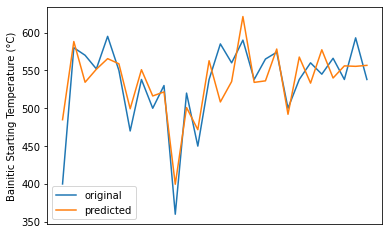

In [388]:
plt.plot(y_test, label = "original")
plt.plot(y_pred, label = "predicted")
plt.legend()
plt.ylabel("Bainitic Starting Temperature (°C)")
plt.xticks([])
plt.savefig("Lin_Reg_graph.jpg")

# Decision Tree Regressor

In [105]:
d_tree = DecisionTreeRegressor(criterion = 'mse', splitter = 'best', max_depth = 4).fit(X_train, y_train) #best max_depth chosen

In [109]:
d_tree.get_n_leaves()

13

In [208]:
imp = d_tree.feature_importances_
imp_df = pd.DataFrame(data = imp, index = ['XC/wt%', 'XMn/wt%', 'XV/wt%', 'XSi/wt%', 'XCr/wt%', 'XMo/wt%',
       'XNi/wt%', 'XW/wt%'], columns = ['Feature_Importance'])
imp_df

,Feature_Importance
XC/wt%,0.121907
XMn/wt%,0.110640
XV/wt%,0.000000
XSi/wt%,0.359629
XCr/wt%,0.111886
XMo/wt%,0.016079
XNi/wt%,0.279860
XW/wt%,0.000000


In [389]:
y_pred = d_tree.predict(X_test)

pred_df = pd.DataFrame(data = X_test, columns = ['XC/wt%', 'XMn/wt%', 'XV/wt%', 'XSi/wt%', 'XCr/wt%', 'XMo/wt%',
       'XNi/wt%', 'XW/wt%'])
pred_df['Texp/°C'] = y_test
pred_df['Pred Texp/°C'] = y_pred

pred_df

,XC/wt%,XMn/wt%,XV/wt%,XSi/wt%,XCr/wt%,XMo/wt%,XNi/wt%,XW/wt%,Texp/°C,Pred Texp/°C
0,0.35,0.43,0.000,0.25,1.55,0.53,2.52,0.00,400,435.750000
1,0.33,0.53,0.000,0.00,0.90,0.18,0.00,0.00,580,542.892857
2,0.48,0.86,0.000,0.25,0.98,0.04,0.18,0.00,570,542.892857
3,0.50,0.77,0.000,0.00,0.50,0.21,0.61,0.00,552,542.892857
4,0.29,1.64,0.000,0.24,0.05,0.45,0.02,0.00,595,563.285714
5,0.42,0.72,0.000,0.00,0.99,0.42,0.05,0.00,550,542.892857
6,0.33,0.51,0.000,0.00,2.32,0.36,0.82,0.00,470,542.892857
7,0.38,1.08,0.000,0.70,0.40,0.11,0.34,0.00,538,563.285714
8,0.40,1.34,0.000,0.21,0.53,0.22,1.03,0.00,500,542.892857
9,0.40,1.38,0.000,0.24,0.53,0.16,0.74,0.00,530,542.892857


In [242]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))

R2 Score: 0.7408500217560852
Mean Squared Error 777.358372813411


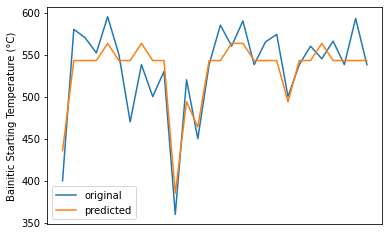

In [390]:
plt.plot(y_test, label = "original")
plt.plot(y_pred, label = "predicted")
plt.legend()
plt.ylabel("Bainitic Starting Temperature (°C)")
plt.xticks([])
plt.savefig("Dec_tree_graph.jpg")

In [204]:
text_representation = tree.export_text(d_tree)
print(text_representation)

|--- feature_3 <= 0.98
|   |--- feature_6 <= 2.48
|   |   |--- feature_4 <= 0.47
|   |   |   |--- feature_5 <= 0.46
|   |   |   |   |--- value: [563.29]
|   |   |   |--- feature_5 >  0.46
|   |   |   |   |--- value: [595.75]
|   |   |--- feature_4 >  0.47
|   |   |   |--- feature_4 <= 2.48
|   |   |   |   |--- value: [542.89]
|   |   |   |--- feature_4 >  2.48
|   |   |   |   |--- value: [490.00]
|   |--- feature_6 >  2.48
|   |   |--- feature_1 <= 0.49
|   |   |   |--- feature_3 <= 0.06
|   |   |   |   |--- value: [479.50]
|   |   |   |--- feature_3 >  0.06
|   |   |   |   |--- value: [435.75]
|   |   |--- feature_1 >  0.49
|   |   |   |--- feature_6 <= 3.34
|   |   |   |   |--- value: [494.00]
|   |   |   |--- feature_6 >  3.34
|   |   |   |   |--- value: [538.00]
|--- feature_3 >  0.98
|   |--- feature_0 <= 0.62
|   |   |--- feature_1 <= 2.17
|   |   |   |--- feature_4 <= 0.25
|   |   |   |   |--- value: [497.50]
|   |   |   |--- feature_4 >  0.25
|   |   |   |   |--- value: [464.00

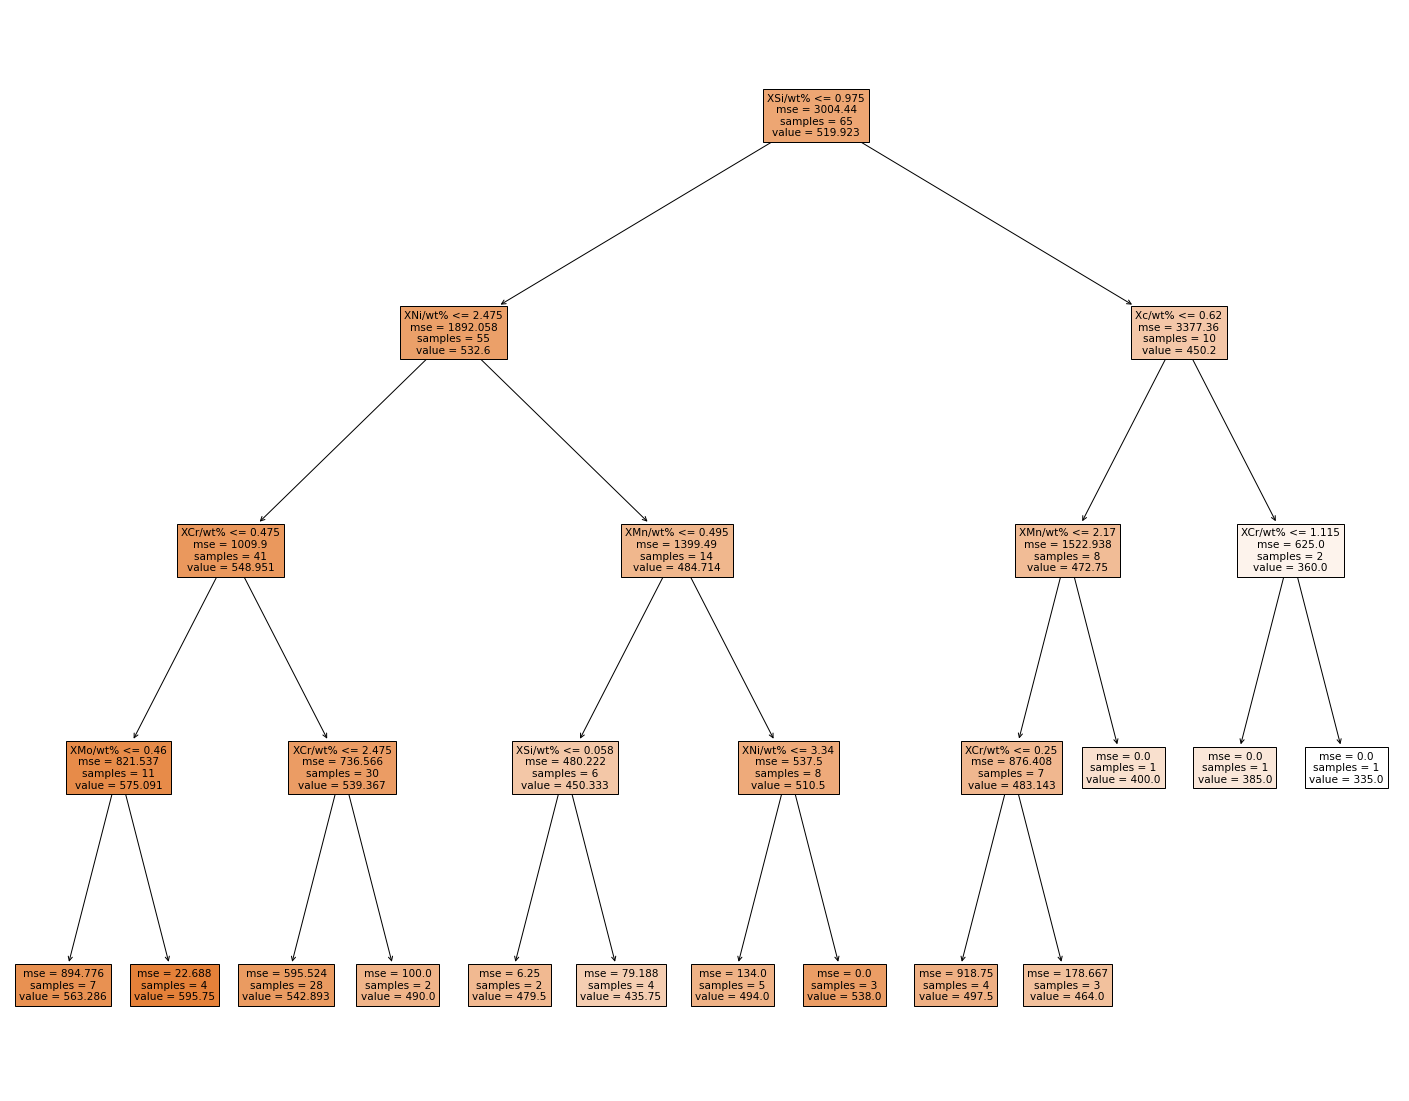

In [206]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(d_tree, feature_names=['Xc/wt%', 'XMn/wt%', 'Xv/wt%', 'XSi/wt%', 'XCr/wt%', 'XMo/wt%',
       'XNi/wt%', 'XW/wt%'], class_names= 'Texp/°C', filled=True)

In [207]:
fig.savefig("decistion_tree.png")

In [391]:
fig.savefig("decision_tree2.jpg")

# Neural Network Model

### tanh activation function with sgd solver

In [392]:
NN_tanh = MLPRegressor(hidden_layer_sizes = (50,50,25,25,10,5), activation = 'tanh', solver = 'sgd',
                         verbose = True).fit(X_train, y_train)

Iteration 1, loss = 136807.01850794
Iteration 2, loss = 135301.44897250
Iteration 3, loss = 132652.83977057
Iteration 4, loss = 128773.29779777
Iteration 5, loss = 123812.47740577
Iteration 6, loss = 118024.22319703
Iteration 7, loss = 111602.58507846
Iteration 8, loss = 104729.07023082
Iteration 9, loss = 97569.14828124
Iteration 10, loss = 90270.37901191
Iteration 11, loss = 82961.64515243
Iteration 12, loss = 75753.12779239
Iteration 13, loss = 68736.81599123
Iteration 14, loss = 61987.40858558
Iteration 15, loss = 55563.49734288
Iteration 16, loss = 49508.94022834
Iteration 17, loss = 43854.34902310
Iteration 18, loss = 38618.62894285
Iteration 19, loss = 33810.51982225
Iteration 20, loss = 29430.09900962
Iteration 21, loss = 25470.21542358
Iteration 22, loss = 21917.83231480
Iteration 23, loss = 18755.26321655
Iteration 24, loss = 15961.29143524
Iteration 25, loss = 13512.16831009
Iteration 26, loss = 11382.48945179
Iteration 27, loss = 9545.95134401
Iteration 28, loss = 7975.9931

In [393]:
NN_tanh.loss_

1774.561707433695

In [394]:
NN_tanh.best_loss_

1502.2734096688923

In [395]:
NN_tanh.n_iter_

53

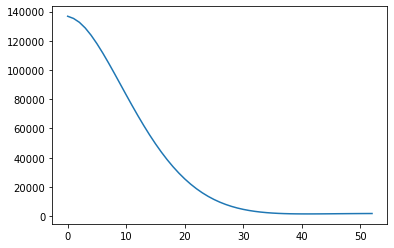

In [400]:
plt.plot(NN_tanh.loss_curve_)
plt.savefig("NN_tanh_training_curve.jpg")

In [322]:
NN_tanh.n_layers_

8

In [398]:
y_pred = NN_tanh.predict(X_test)

pred_df = pd.DataFrame(data = X_test, columns = ['XC/wt%', 'XMn/wt%', 'XV/wt%', 'XSi/wt%', 'XCr/wt%', 'XMo/wt%',
       'XNi/wt%', 'XW/wt%'])
pred_df['Texp/°C'] = y_test
pred_df['Pred Texp/°C'] = y_pred

pred_df

,XC/wt%,XMn/wt%,XV/wt%,XSi/wt%,XCr/wt%,XMo/wt%,XNi/wt%,XW/wt%,Texp/°C,Pred Texp/°C
0,0.35,0.43,0.000,0.25,1.55,0.53,2.52,0.00,400,543.685447
1,0.33,0.53,0.000,0.00,0.90,0.18,0.00,0.00,580,543.685448
2,0.48,0.86,0.000,0.25,0.98,0.04,0.18,0.00,570,543.685448
3,0.50,0.77,0.000,0.00,0.50,0.21,0.61,0.00,552,543.685447
4,0.29,1.64,0.000,0.24,0.05,0.45,0.02,0.00,595,543.685448
5,0.42,0.72,0.000,0.00,0.99,0.42,0.05,0.00,550,543.685448
6,0.33,0.51,0.000,0.00,2.32,0.36,0.82,0.00,470,543.685448
7,0.38,1.08,0.000,0.70,0.40,0.11,0.34,0.00,538,543.685448
8,0.40,1.34,0.000,0.21,0.53,0.22,1.03,0.00,500,543.685447
9,0.40,1.38,0.000,0.24,0.53,0.16,0.74,0.00,530,543.685447


In [399]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))

R2 Score: -0.03338312732976778
Mean Squared Error 3099.784270858857


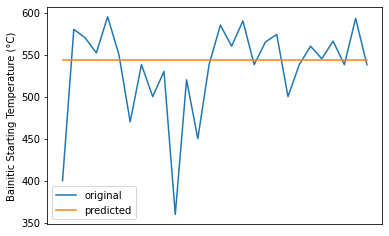

In [401]:
plt.plot(y_test, label = "original")
plt.plot(y_pred, label = "predicted")
plt.legend()
plt.ylabel("Bainitic Starting Temperature (°C)")
plt.xticks([])
plt.savefig('NN_tanh_sgd_graph.jpg')

### Relu Activation Function

In [344]:
NN_relu = MLPRegressor(hidden_layer_sizes = (50,), solver='lbfgs').fit(X_train, y_train) #hidden layers has been customized

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [402]:
NN_relu.n_layers_

3

In [403]:
NN_relu.loss_

156.96983325530286

In [404]:
y_pred = NN_relu.predict(X_test)

pred_df = pd.DataFrame(data = X_test, columns = ['XC/wt%', 'XMn/wt%', 'XV/wt%', 'XSi/wt%', 'XCr/wt%', 'XMo/wt%',
       'XNi/wt%', 'XW/wt%'])
pred_df['Texp/°C'] = y_test
pred_df['Pred Texp/°C'] = y_pred

pred_df

,XC/wt%,XMn/wt%,XV/wt%,XSi/wt%,XCr/wt%,XMo/wt%,XNi/wt%,XW/wt%,Texp/°C,Pred Texp/°C
0,0.35,0.43,0.000,0.25,1.55,0.53,2.52,0.00,400,479.842353
1,0.33,0.53,0.000,0.00,0.90,0.18,0.00,0.00,580,589.825035
2,0.48,0.86,0.000,0.25,0.98,0.04,0.18,0.00,570,537.668083
3,0.50,0.77,0.000,0.00,0.50,0.21,0.61,0.00,552,567.563555
4,0.29,1.64,0.000,0.24,0.05,0.45,0.02,0.00,595,590.508449
5,0.42,0.72,0.000,0.00,0.99,0.42,0.05,0.00,550,567.253640
6,0.33,0.51,0.000,0.00,2.32,0.36,0.82,0.00,470,500.864981
7,0.38,1.08,0.000,0.70,0.40,0.11,0.34,0.00,538,528.169689
8,0.40,1.34,0.000,0.21,0.53,0.22,1.03,0.00,500,510.524969
9,0.40,1.38,0.000,0.24,0.53,0.16,0.74,0.00,530,514.306024


In [405]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))

R2 Score: 0.7124773314828897
Mean Squared Error 862.4664190982961


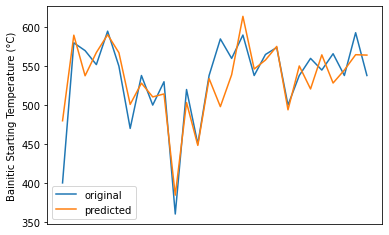

In [406]:
plt.plot(y_test, label = "original")
plt.plot(y_pred, label = "predicted")
plt.legend()
plt.ylabel("Bainitic Starting Temperature (°C)")
plt.xticks([])
plt.savefig("NN_relu_lbfgs_graph.jpg")

### tanh activation with lbfgs solver

In [378]:
NN_tanh_l = MLPRegressor(hidden_layer_sizes = (50,), activation = 'tanh', solver = 'lbfgs').fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [379]:
NN_tanh_l.n_layers_

3

In [380]:
NN_tanh_l.loss_

158.61818003284424

In [407]:
y_pred = NN_tanh_l.predict(X_test)

pred_df = pd.DataFrame(data = X_test, columns = ['XC/wt%', 'XMn/wt%', 'XV/wt%', 'XSi/wt%', 'XCr/wt%', 'XMo/wt%',
       'XNi/wt%', 'XW/wt%'])
pred_df['Texp/°C'] = y_test
pred_df['Pred Texp/°C'] = y_pred

pred_df

,XC/wt%,XMn/wt%,XV/wt%,XSi/wt%,XCr/wt%,XMo/wt%,XNi/wt%,XW/wt%,Texp/°C,Pred Texp/°C
0,0.35,0.43,0.000,0.25,1.55,0.53,2.52,0.00,400,478.919472
1,0.33,0.53,0.000,0.00,0.90,0.18,0.00,0.00,580,555.175282
2,0.48,0.86,0.000,0.25,0.98,0.04,0.18,0.00,570,552.984657
3,0.50,0.77,0.000,0.00,0.50,0.21,0.61,0.00,552,554.829577
4,0.29,1.64,0.000,0.24,0.05,0.45,0.02,0.00,595,555.252458
5,0.42,0.72,0.000,0.00,0.99,0.42,0.05,0.00,550,553.918642
6,0.33,0.51,0.000,0.00,2.32,0.36,0.82,0.00,470,506.300211
7,0.38,1.08,0.000,0.70,0.40,0.11,0.34,0.00,538,559.634793
8,0.40,1.34,0.000,0.21,0.53,0.22,1.03,0.00,500,552.927417
9,0.40,1.38,0.000,0.24,0.53,0.16,0.74,0.00,530,554.001964


In [408]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))

R2 Score: 0.7456833037967892
Mean Squared Error 762.8602343687544


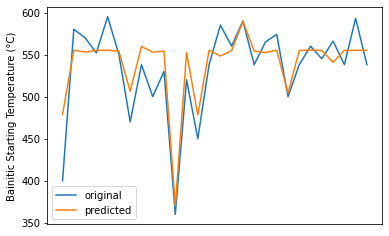

In [409]:
plt.plot(y_test, label = "original")
plt.plot(y_pred, label = "predicted")
plt.legend()
plt.ylabel("Bainitic Starting Temperature (°C)")
plt.xticks([])
plt.savefig("NN_relu_lbfgs_graph.jpg")